In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import mplcursors
pd.set_option('display.max_columns', None)

In [13]:
playoff_data_DF = pd.read_excel('Playoff DataFrame.xlsx')

In [14]:
playoff_data_DF.rename(columns={'Unnamed: 0': 'Player Name'}, inplace = True)
playoff_data_DF.set_index('Player Name', inplace = True)

In [15]:
playoff_data_DF

,Playoff Games Played,Playoff Points Scored
Player Name,,
Alaa Abdelnaby,17,38
Zaid Abdul-Aziz,18,92
Kareem Abdul-Jabbar,237,5762
Mahmoud Abdul-Rauf,15,195
Tariq Abdul-Wahad,13,68
...,...,...
Wang Zhi-zhi,16,30
Paul Zipser,6,44
Ante Zizic,8,13


<IPython.core.display.Javascript object>


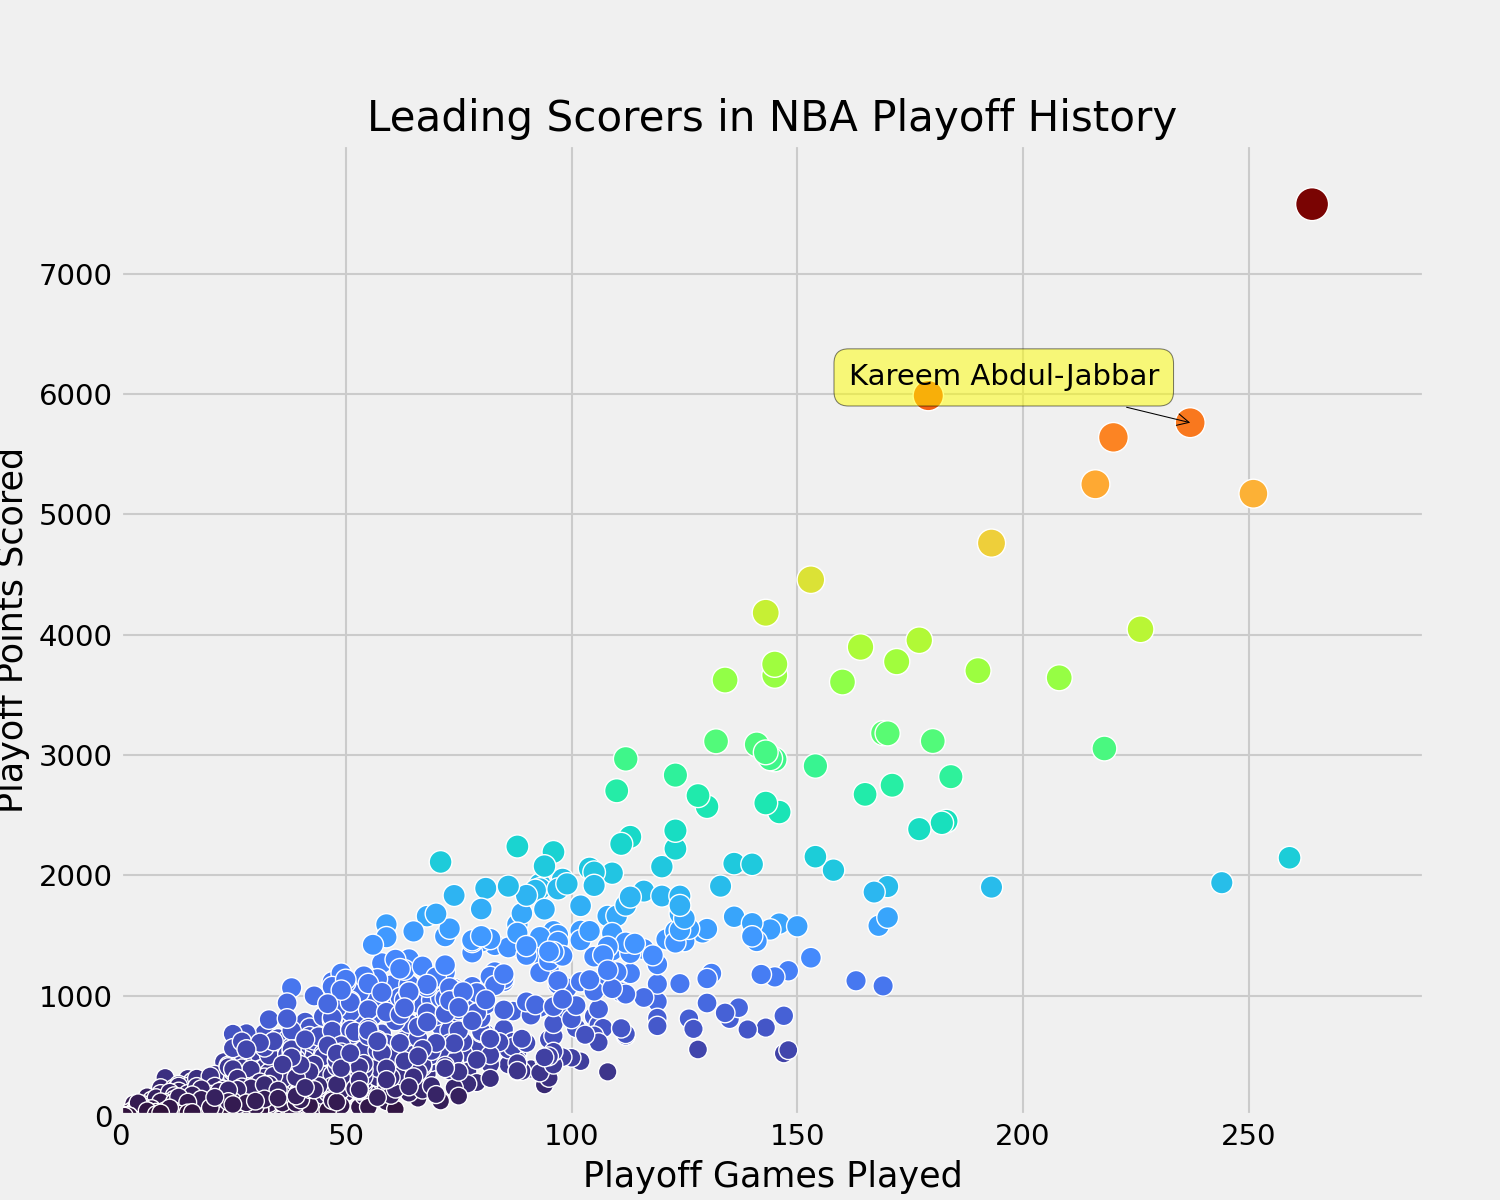

In [16]:
# Magic command to create a live interactive graph (below) 
# This also allows us to zoom in on various subsets of our graph and get a much closer look at each individual
# point as their are almost 3k many of which are stacked on top of each other
%matplotlib notebook

# Styling scatter plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data = playoff_data_DF, x = 'Playoff Games Played', y = 'Playoff Points Scored', hue = 'Playoff Points Scored',
    palette = 'turbo', size = 'Playoff Points Scored', sizes = (70, 250), legend = False)

plt.xticks(np.arange(0, playoff_data_DF['Playoff Games Played'].max(), 50))
plt.yticks(np.arange(0, playoff_data_DF['Playoff Points Scored'].max(), 1000))
plt.title('Leading Scorers in NBA Playoff History')

plt.xlim(0, playoff_data_DF['Playoff Games Played'].max() + 25)
plt.ylim(0, playoff_data_DF['Playoff Points Scored'].max() + 500)

"""
I found the following lambda function online and modified it to show the index value when you hover over a
point rather than the x,y coordinates.  This way, whenever you hover over a point in the live graph below it will
tell you which player that point represents.
"""

mplcursors.cursor().connect(
    "add", lambda sel: sel.annotation.set_text(playoff_data_DF.index[sel.target.index]))

plt.show()